# Linear Regression ML Model

* Import the Data
* Analyze the Data
* Clean the Data
* Preprocess the Data
* Train_Test_Split the data
* Create the Model
* Train the Model
* Test/Predict the the Model
* Find the Error Rate
* Check the Errors for use the various metrics
* Visulize the Model Prediction

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('insurance_data.csv')

In [98]:
df.shape

(1338, 13)

In [99]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


### Clean data
* No null val
* no duplicates
* no outlier

In [100]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [101]:
df.isnull().sum().sum()

np.int64(52)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

df.dropna() ==>  if delete null val so use

### fill the null val
* if num val so use mean val
* if char val so use mode val

In [103]:
col_list = list(df.columns)

In [104]:
for x in col_list:
    if df[x].dtype=='object':
        df[x] = df[x].fillna(df[x].mode()[0])
    else:
        df[x] = df[x].fillna(df[x].mean())

In [105]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [106]:
#Duplicacy

df.duplicated().sum()
# df.drop_duplicates(inplace= True)

np.int64(0)

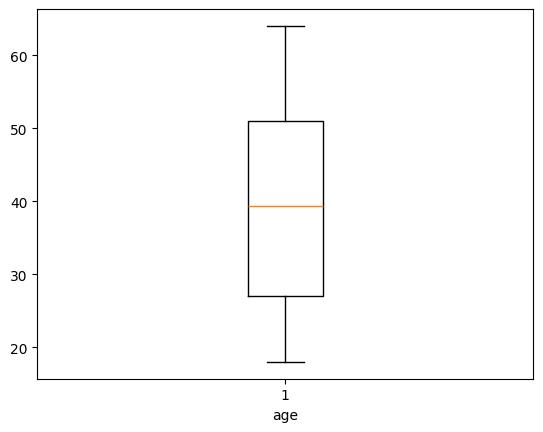

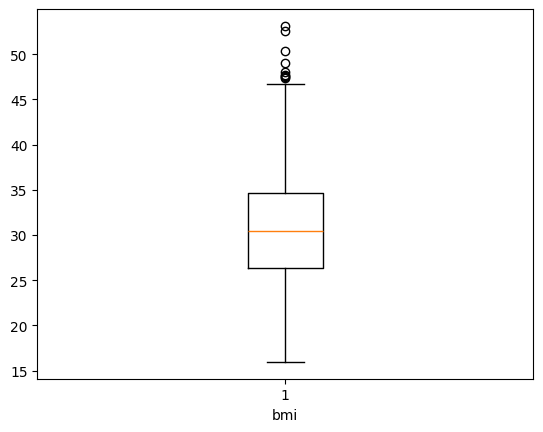

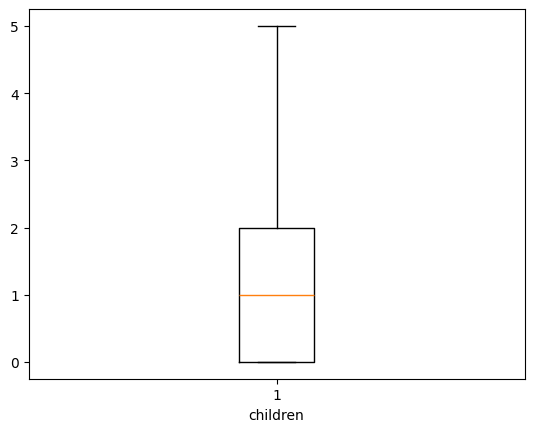

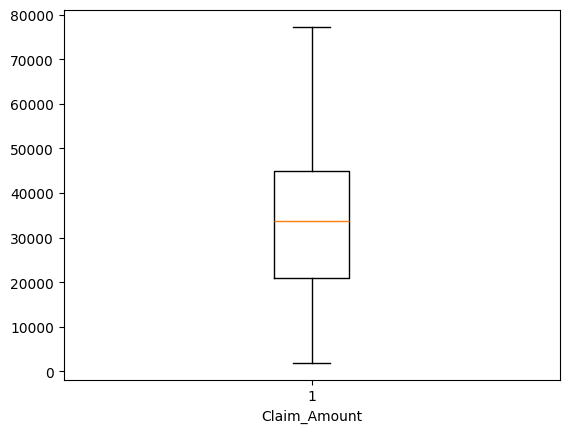

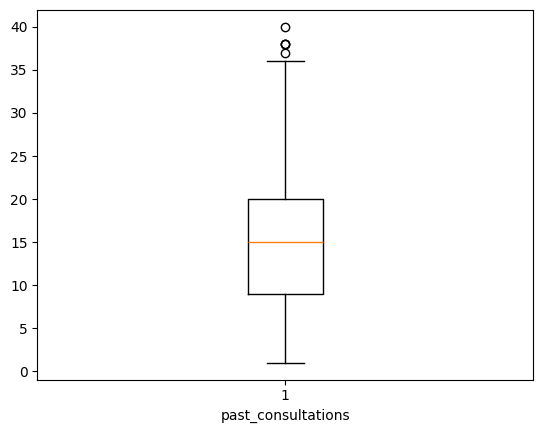

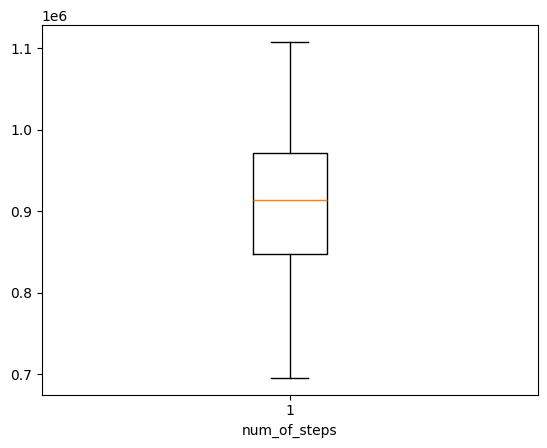

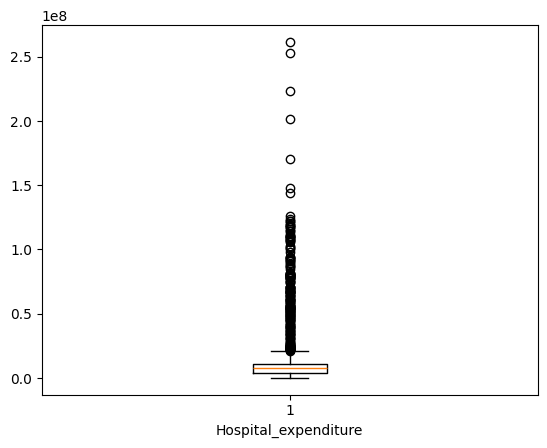

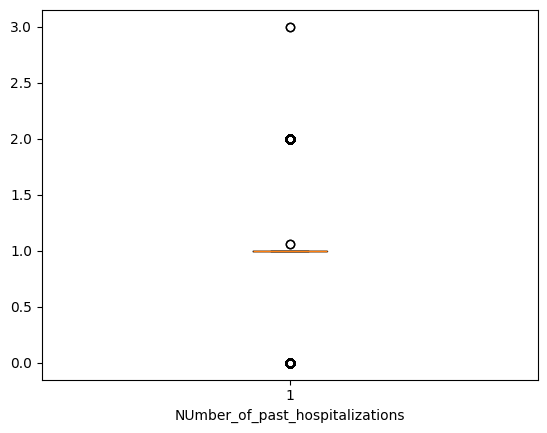

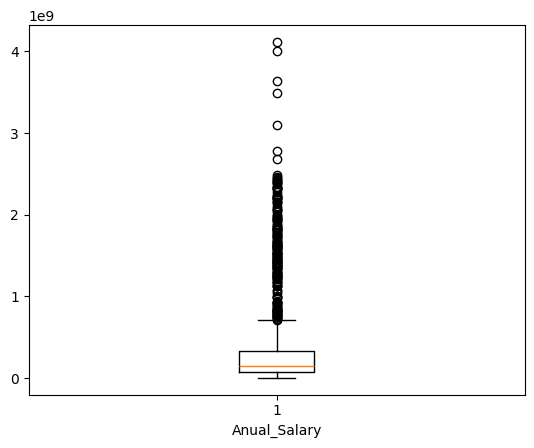

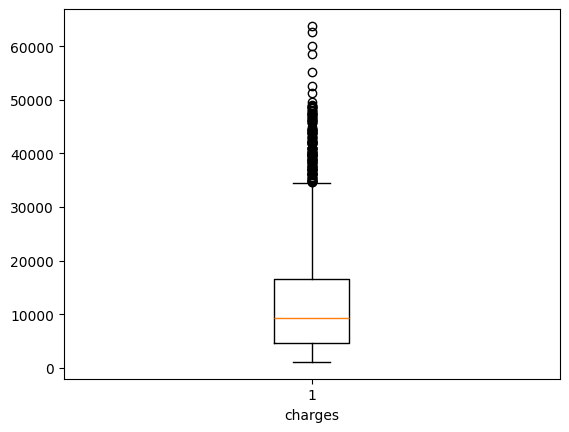

In [107]:
#Outliers ->
for x in col_list:
    if df[x].dtype=='float64':
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.show()

### Remove Outliers

In [ ]:
for x in col_list:
    if df[x].dtypes=='float64' and x!='charges':
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3-Q1
        lower_fence = Q1 - 1.5*IQR
        upper_fence = Q3 + 1.5*IQR

        df = df[(df[x]>=lower_fence) & (df[x]<=upper_fence)]

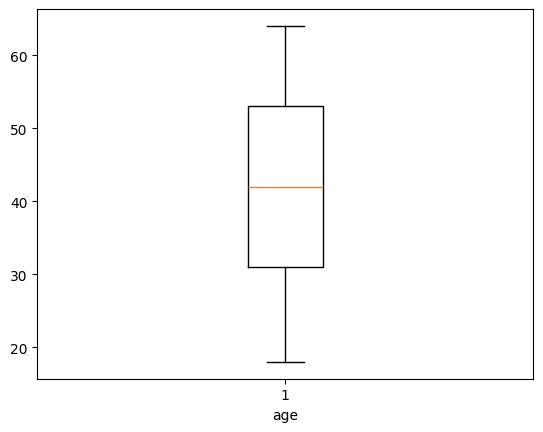

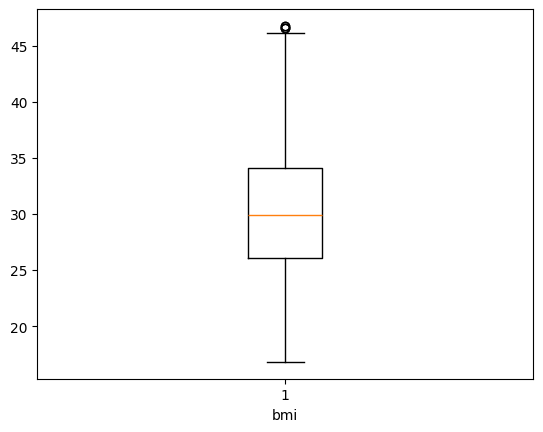

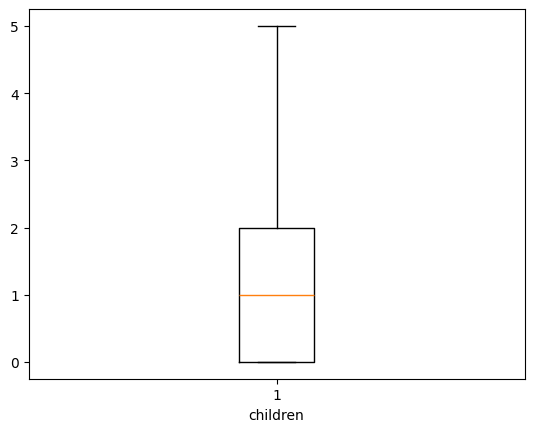

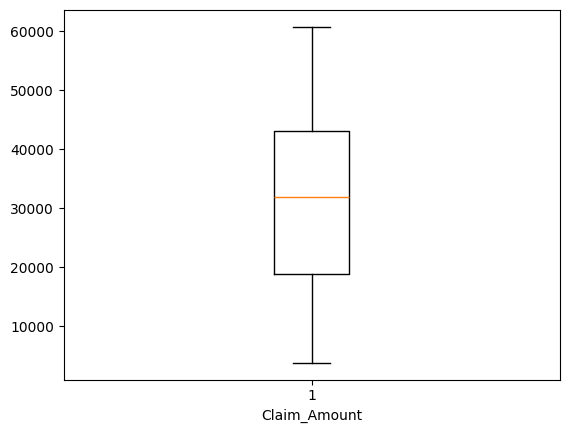

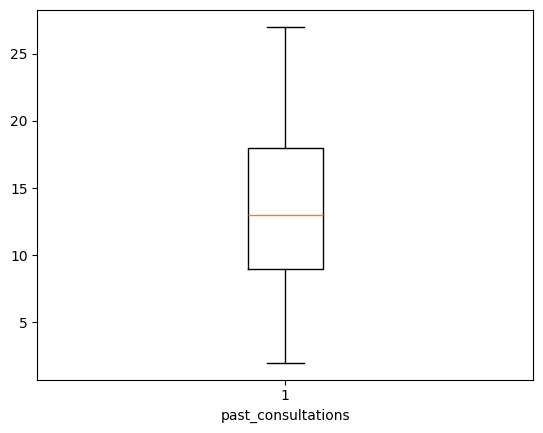

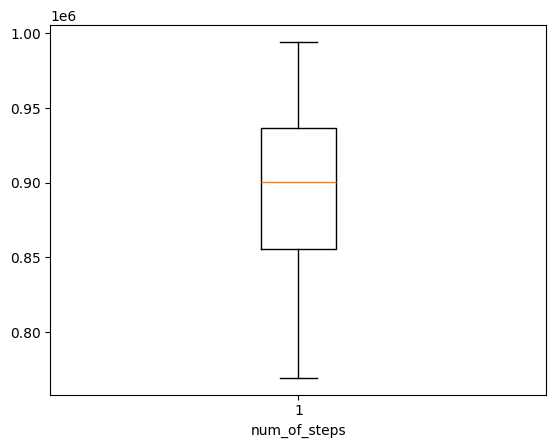

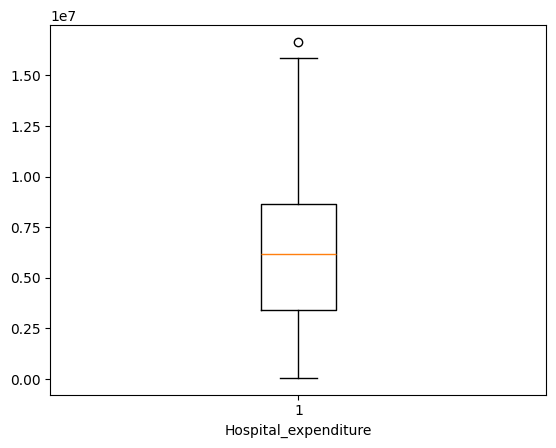

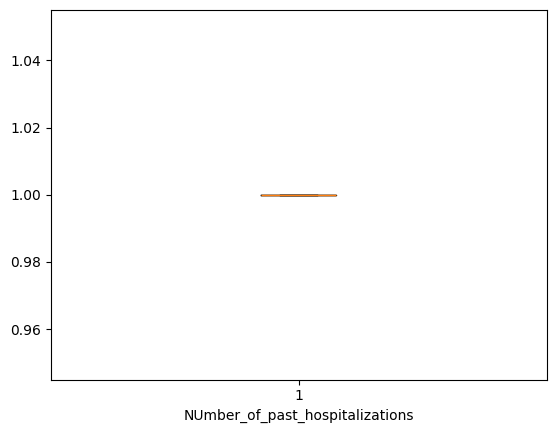

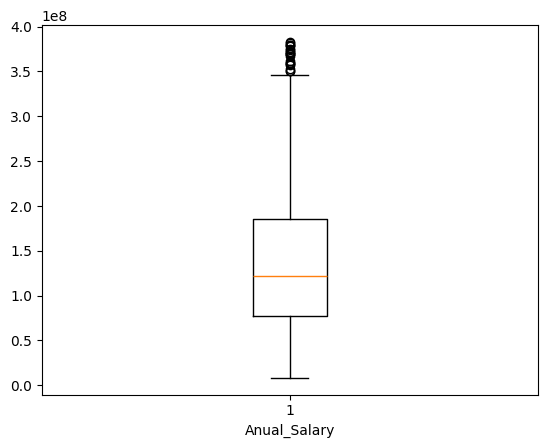

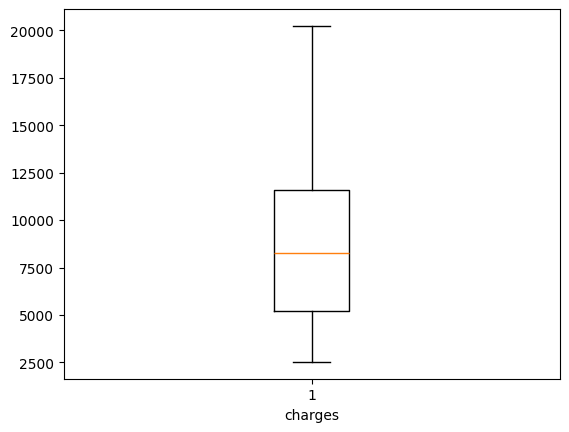

In [109]:
for x in col_list:
    if df[x].dtype=='float64':
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.show()

In [110]:
df.shape

(881, 13)

# Pre-Process the data

### Variance inflation factor 
-> Co-relation between your columns.
* Higher the VIF higher the co-relation
* VIF<=6 is considered as good. rest means there is high-corelaiton.
* VIF>6 we will remove that column from our dataset.

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# create one list and add (num val and independent var)
ind_var_list = []

for x in df.columns:
    if df[x].dtypes!='object' and x!='charges':
        ind_var_list.append(x)

# ind var list to create dummy data
ind_var_df = df[ind_var_list]

# vif table create
vif_data = pd.DataFrame()
vif_data["Features"] = ind_var_df.columns
vif_data["VIF"] = [variance_inflation_factor(ind_var_df.values,i) for i in range(len(ind_var_df.columns))]
vif_data

,Features,VIF
0,age,2.196194
1,bmi,1.052717
2,children,1.076523
3,Claim_Amount,1.035033
4,past_consultations,1.073989
5,num_of_steps,5.882074
6,Hospital_expenditure,1.173208
7,NUmber_of_past_hospitalizations,1393.169724
8,Anual_Salary,3.983678


In [113]:
# drop highest vif col in the main data
df = df.drop(columns=["NUmber_of_past_hospitalizations"],axis=1)

ind_var_list = []

for x in df.columns:
    if df[x].dtypes!='object' and x!='charges':
        ind_var_list.append(x)

ind_var_df = df[ind_var_list]

vif_data = pd.DataFrame()
vif_data["Features"] = ind_var_df.columns
vif_data["VIF"] = [variance_inflation_factor(ind_var_df.values,i) for i in range(len(ind_var_df.columns))]
vif_data

,Features,VIF
0,age,16.357708
1,bmi,26.868143
2,children,2.069345
3,Claim_Amount,5.864753
4,past_consultations,6.463488
5,num_of_steps,58.376344
6,Hospital_expenditure,5.423018
7,Anual_Salary,6.000703


In [115]:
df = df.drop(['num_of_steps'], axis=1)

ind_var_list = []
for x in df.columns:
    if df[x].dtypes!='object' and x!='charges':
        ind_var_list.append(x)

ind_var_df = df[ind_var_list]

vif_data = pd.DataFrame()
vif_data['Features'] = ind_var_df.columns
vif_data['VIF'] = [variance_inflation_factor(ind_var_df.values, i) for i in range(len(ind_var_df.columns))]
vif_data

,Features,VIF
0,age,13.550906
1,bmi,14.522848
2,children,1.954239
3,Claim_Amount,5.319321
4,past_consultations,5.957746
5,Hospital_expenditure,5.142291
6,Anual_Salary,5.783595


In [116]:
df = df.drop(['bmi'], axis=1)

ind_var_list = []
for x in df.columns:
    if df[x].dtypes!='object' and x!='charges':
        ind_var_list.append(x)

ind_var_df = df[ind_var_list]

vif_data = pd.DataFrame()
vif_data['Features'] = ind_var_df.columns
vif_data['VIF'] = [variance_inflation_factor(ind_var_df.values, i) for i in range(len(ind_var_df.columns))]
vif_data

,Features,VIF
0,age,8.803866
1,children,1.835999
2,Claim_Amount,4.912972
3,past_consultations,5.613220
4,Hospital_expenditure,4.840950
5,Anual_Salary,5.636699


In [117]:
df = df.drop(['age'], axis=1)

ind_var_list = []
for x in df.columns:
    if df[x].dtypes!='object' and x!='charges':
        ind_var_list.append(x)

ind_var_df = df[ind_var_list]

vif_data = pd.DataFrame()
vif_data['Features'] = ind_var_df.columns
vif_data['VIF'] = [variance_inflation_factor(ind_var_df.values, i) for i in range(len(ind_var_df.columns))]
vif_data

,Features,VIF
0,children,1.827298
1,Claim_Amount,4.290828
2,past_consultations,4.942338
3,Hospital_expenditure,4.624025
4,Anual_Salary,4.922027


# Model Building

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [120]:
df.head()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0,no,39148.95495,10.0,8.614147e+06,54526009.33,northwest,2523.16950
152,female,0.0,no,41547.52536,13.0,2.491594e+05,16718473.13,northwest,2527.81865
153,male,0.0,no,39660.60193,12.0,3.043323e+06,48526941.68,northwest,2534.39375
154,male,2.0,no,16032.87148,7.0,1.599069e+06,24412621.85,southeast,2566.47070
155,female,1.0,no,31090.98977,21.0,3.015365e+06,58535788.80,southwest,2585.26900


In [121]:
X = df.loc[:, ind_var_list]
Y = df.iloc[:, -1]

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

In [124]:
LR_model = LinearRegression()

In [125]:
LR_model.fit(X_train, Y_train)

LinearRegression()

In [132]:
Y_train_predict = LR_model.predict(X_train)
Y_test_predict = LR_model.predict(X_test)

In [133]:
error_df = pd.DataFrame(columns=['Actual_val', 'Predicted_val', 'error_rate'])

In [137]:
error_df['Actual_val'] = Y_test
error_df['Predicted_val'] = Y_test_predict

In [139]:
error_df['error_rate'] = error_df['Actual_val'] - error_df['Predicted_val']
error_df.head()

,Actual_val,Predicted_val,error_rate
956,14254.60820,13464.933008,789.675192
954,14210.53595,14431.959818,-221.423868
792,11305.93455,10891.985722,413.948828
280,4151.02870,5816.761797,-1665.733097
723,10197.77220,11016.427514,-818.655314


# To check errors 
### ==> MSE, RMSE, MAE, MAPE, R2-Score

In [140]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [141]:
mean_squared_error(Y_test, Y_test_predict)

np.float64(2511823.1063991482)

In [142]:
root_mean_squared_error(Y_test, Y_test_predict)

np.float64(1584.873214613443)

In [143]:
mean_absolute_error(Y_test, Y_test_predict)

np.float64(1283.8047100202175)

In [145]:
mean_absolute_percentage_error(Y_test, Y_test_predict)

np.float64(0.2165972421755879)

In [146]:
r2_score(Y_test, Y_test_predict)

0.8404906732410586

# Visulization of Linear Regression for Fit Line

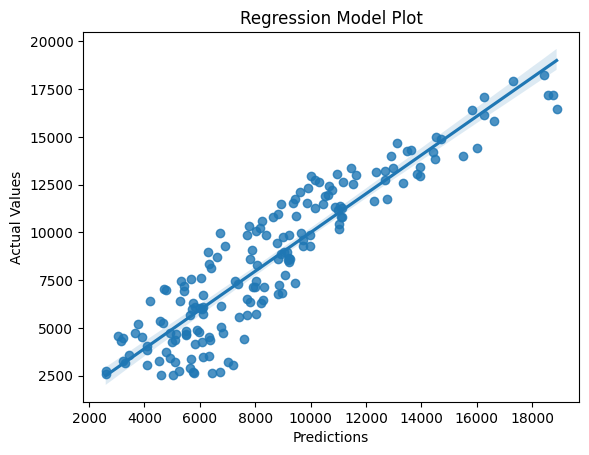

In [147]:
sns.regplot(x=Y_test_predict, y=Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Regression Model Plot')
plt.show()